In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
# Load dataset
df = pd.read_csv("temperatures.csv")  

# Keep only relevant columns (YEAR + Monthly temperatures)
df_filtered = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                  'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

In [33]:
# Convert month-wise columns into rows
df_melted = df_filtered.melt(id_vars=["YEAR"], var_name="Month", value_name="Temperature")

# Map month names to numerical values
month_mapping = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6, 
    "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}
df_melted["Month_Num"] = df_melted["Month"].map(month_mapping)

In [34]:
# Create better features for seasonality
df_melted['Month_Sin'] = np.sin(2 * np.pi * df_melted['Month_Num'] / 12)
df_melted['Month_Cos'] = np.cos(2 * np.pi * df_melted['Month_Num'] / 12)

# Display the transformed dataset
print(df_melted.head())

   YEAR Month  Temperature  Month_Num  Month_Sin  Month_Cos
0  1901   JAN        22.40          1        0.5   0.866025
1  1902   JAN        24.93          1        0.5   0.866025
2  1903   JAN        23.44          1        0.5   0.866025
3  1904   JAN        22.50          1        0.5   0.866025
4  1905   JAN        22.00          1        0.5   0.866025


In [35]:
# Define features and target
X = df_melted[['Month_Num', 'Month_Sin', 'Month_Cos']]
y = df_melted['Temperature']


In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Create polynomial features (degree 2 is enough for a good model)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [40]:
# Print metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 0.6311
Mean Absolute Error: 0.5945
R-squared: 0.9365


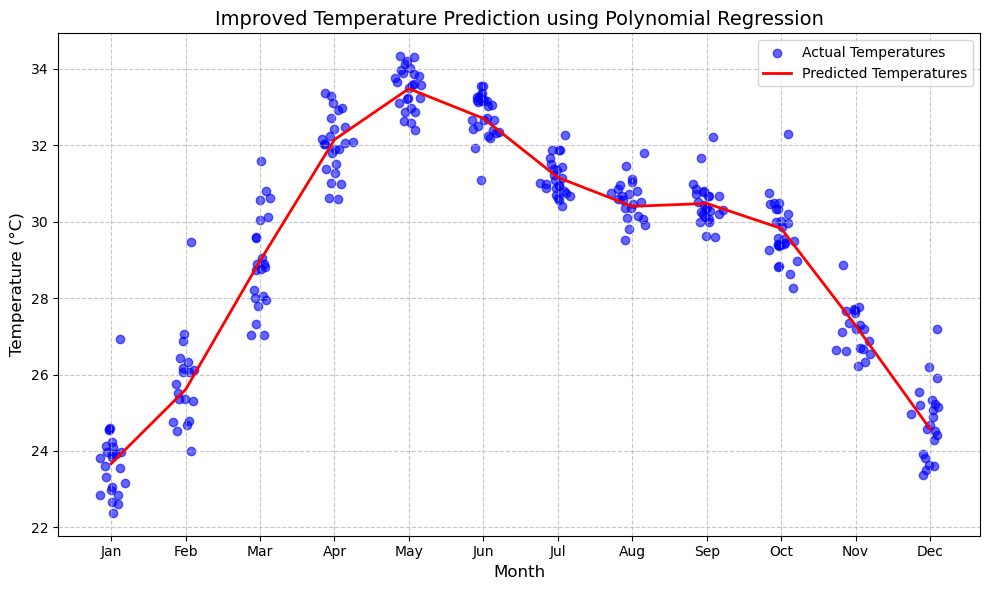

In [41]:
# Plot actual vs predicted values with improved visualization
plt.figure(figsize=(10, 6))

# Add a bit of jitter to better see overlapping points
jitter = 0.1
plt.scatter(X_test['Month_Num'] + np.random.normal(0, jitter, len(X_test)), 
            y_test, 
            color='blue', 
            alpha=0.6, 
            label="Actual Temperatures")

# Sort by month for smoother predicted line
month_order = X_test['Month_Num'].argsort()
plt.plot(X_test['Month_Num'].iloc[month_order], 
         y_pred[month_order], 
         color='red', 
         linewidth=2, 
         label="Predicted Temperatures")

plt.xlabel("Month", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Improved Temperature Prediction using Polynomial Regression", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


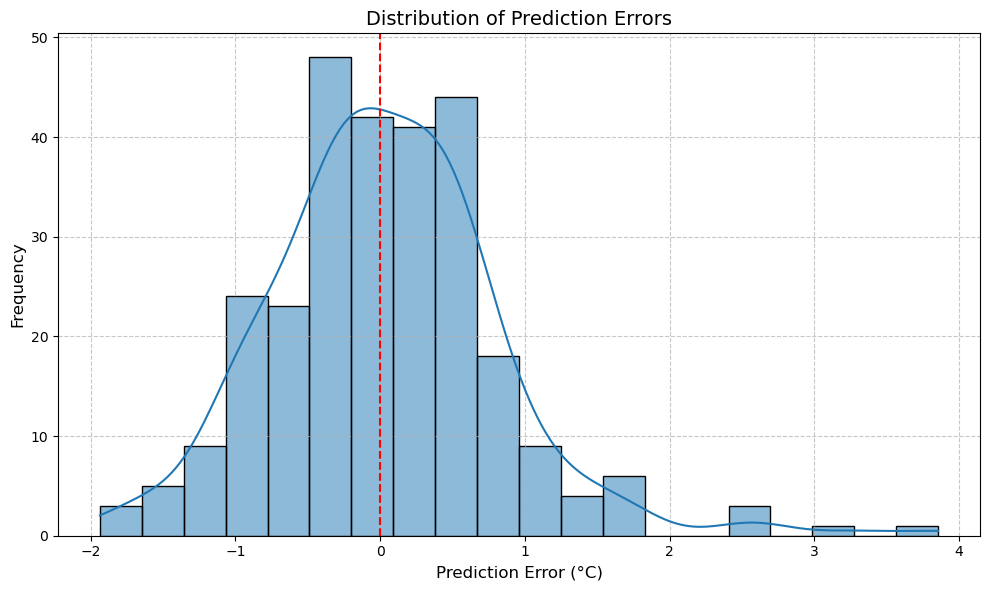

In [42]:
# Create a second plot showing the distribution of errors
plt.figure(figsize=(10, 6))

errors = y_test - y_pred
sns.histplot(errors, kde=True, bins=20)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Prediction Error (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Prediction Errors", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()